<a href="https://colab.research.google.com/github/abner-lucas/preprocessing_EEG_with_MNE/blob/master/preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Pre-processing EEG data with MNE-Python
Datagenerated in BrainVision Recorder software (.vhdr, .eeg, .vmrk)

#### Packets and connections

In [1]:
#!git clone https://github.com/abner-lucas/preprocessing_EEG_with_MNE.git

In [ ]:
#Install package
!pip install mne
!pip install autoreject
!pip install h5io

In [3]:
#Connect to Google Drive to get raw data
from google.colab import drive
drive.mount('/content/drive/MyDrive/Colab Notebooks/PPGCC/EEG/preprocessing_EEG_with_MNE/')

Mounted at /content/drive


In [4]:
import mne
mne.set_log_level('error')

import glob
import pandas as pd
import matplotlib.pyplot as plt

#### Loading data

In [5]:
#Dataset path in my GDrive
path = f'data_brainvision/'
subject = 'Metzler0004'

#Checking existence of all files
glob.glob(path + subject + '*')

['/content/drive/MyDrive/Colab Notebooks/PPGCC/EEG/preprocessing_EEG_with_MNE/data_brainvision/Metzler0004.eeg',
 '/content/drive/MyDrive/Colab Notebooks/PPGCC/EEG/preprocessing_EEG_with_MNE/data_brainvision/Metzler0004.vmrk',
 '/content/drive/MyDrive/Colab Notebooks/PPGCC/EEG/preprocessing_EEG_with_MNE/data_brainvision/Metzler0004.vhdr']

In [6]:
#Subject 0004 files 
name_files = [subject + '.eeg', subject + '.vhdr', subject + '.vmrk']
files = [path + name for name in name_files]

#Reading EEG files
raw_data = mne.io.read_raw_brainvision(files[1], preload=True) #Preloading raw data into memory
raw_data

<RawBrainVision | Metzler0004.eeg, 64 x 1823140 (1823.1 s), ~890.3 MB, data loaded>

/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:263: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  c = np.array(c)


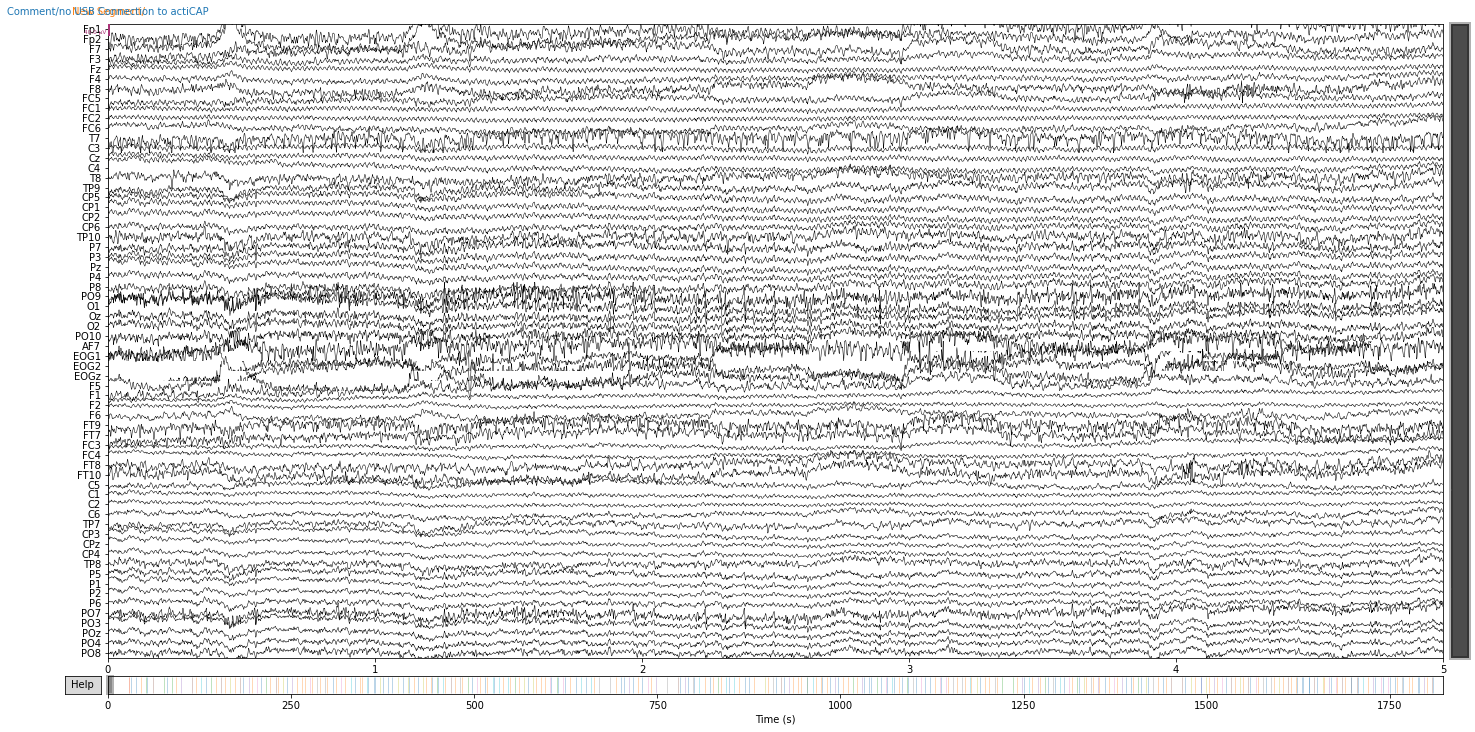

In [7]:
#Resizing plot figure
mne.set_config('MNE_BROWSE_RAW_SIZE','20,10')

#Plotting first 5s of raw data from all channels
raw_data.plot(n_channels=64, duration=5);

#### Working with metadata

In [8]:
#Viewing keys in the raw data
raw_data.info.keys()

dict_keys(['acq_pars', 'acq_stim', 'ctf_head_t', 'description', 'dev_ctf_t', 'dig', 'experimenter', 'utc_offset', 'device_info', 'file_id', 'highpass', 'hpi_subsystem', 'kit_system_id', 'helium_info', 'line_freq', 'lowpass', 'meas_date', 'meas_id', 'proj_id', 'proj_name', 'subject_info', 'xplotter_layout', 'gantry_angle', 'bads', 'chs', 'comps', 'events', 'hpi_meas', 'hpi_results', 'projs', 'proc_history', 'custom_ref_applied', 'sfreq', 'dev_head_t', 'ch_names', 'nchan'])

In [9]:
#Viewing dictionary of raw data
raw_data.__dict__

{'_annotations': <Annotations | 315 segments: Comment/no USB Connection to actiCAP (1), New ...>,
 '_cals': array([1.e-07, 1.e-07, 1.e-07, 1.e-07, 1.e-07, 1.e-07, 1.e-07, 1.e-07,
        1.e-07, 1.e-07, 1.e-07, 1.e-07, 1.e-07, 1.e-07, 1.e-07, 1.e-07,
        1.e-07, 1.e-07, 1.e-07, 1.e-07, 1.e-07, 1.e-07, 1.e-07, 1.e-07,
        1.e-07, 1.e-07, 1.e-07, 1.e-07, 1.e-07, 1.e-07, 1.e-07, 1.e-07,
        1.e-07, 1.e-07, 1.e-07, 1.e-07, 1.e-07, 1.e-07, 1.e-07, 1.e-07,
        1.e-07, 1.e-07, 1.e-07, 1.e-07, 1.e-07, 1.e-07, 1.e-07, 1.e-07,
        1.e-07, 1.e-07, 1.e-07, 1.e-07, 1.e-07, 1.e-07, 1.e-07, 1.e-07,
        1.e-07, 1.e-07, 1.e-07, 1.e-07, 1.e-07, 1.e-07, 1.e-07, 1.e-07]),
 '_comp': None,
 '_cropped_samp': 0,
 '_data': array([[-1.557e-04, -1.458e-04, -1.393e-04, ...,  7.910e-05,  7.840e-05,
          7.880e-05],
        [-6.070e-05, -6.570e-05, -6.900e-05, ...,  8.900e-06,  7.400e-06,
          6.600e-06],
        [-2.400e-05, -2.000e-05, -1.480e-05, ...,  1.510e-04,  1.484e-04,
   

In [10]:
#Viewing channel names
print(raw_data.info['ch_names'])

['Fp1', 'Fp2', 'F7', 'F3', 'Fz', 'F4', 'F8', 'FC5', 'FC1', 'FC2', 'FC6', 'T7', 'C3', 'Cz', 'C4', 'T8', 'TP9', 'CP5', 'CP1', 'CP2', 'CP6', 'TP10', 'P7', 'P3', 'Pz', 'P4', 'P8', 'PO9', 'O1', 'Oz', 'O2', 'PO10', 'AF7', 'EOG1', 'EOG2', 'EOGz', 'F5', 'F1', 'F2', 'F6', 'FT9', 'FT7', 'FC3', 'FC4', 'FT8', 'FT10', 'C5', 'C1', 'C2', 'C6', 'TP7', 'CP3', 'CPz', 'CP4', 'TP8', 'P5', 'P1', 'P2', 'P6', 'PO7', 'PO3', 'POz', 'PO4', 'PO8']


In [11]:
#Setting the reference channel for eyes movement
raw_data.set_channel_types({'EOG1': 'eog', 'EOG2': 'eog', 'EOGz': 'eog'})

<RawBrainVision | Metzler0004.eeg, 64 x 1823140 (1823.1 s), ~890.3 MB, data loaded>

In [12]:
#Setting the 10-20 pattern in the channel position
raw_data.set_montage('standard_1020')
raw_data.info['dig']

[<DigPoint |        LPA : (-82.5, -0.0, 0.0) mm     : head frame>,
 <DigPoint |     Nasion : (0.0, 114.0, 0.0) mm      : head frame>,
 <DigPoint |        RPA : (82.5, 0.0, -0.0) mm      : head frame>,
 <DigPoint |     EEG #1 : (-30.9, 114.6, 27.9) mm   : head frame>,
 <DigPoint |     EEG #3 : (28.4, 115.3, 27.7) mm    : head frame>,
 <DigPoint |     EEG #5 : (-56.4, 99.2, 25.1) mm    : head frame>,
 <DigPoint |    EEG #16 : (-71.9, 73.1, 25.8) mm    : head frame>,
 <DigPoint |    EEG #17 : (-66.1, 80.2, 53.8) mm    : head frame>,
 <DigPoint |    EEG #18 : (-51.8, 86.7, 78.7) mm    : head frame>,
 <DigPoint |    EEG #19 : (-29.0, 91.4, 96.6) mm    : head frame>,
 <DigPoint |    EEG #20 : (-1.2, 93.3, 102.6) mm    : head frame>,
 <DigPoint |    EEG #21 : (28.0, 91.9, 95.8) mm     : head frame>,
 <DigPoint |    EEG #22 : (50.3, 87.4, 77.3) mm     : head frame>,
 <DigPoint |    EEG #23 : (66.3, 81.5, 53.1) mm     : head frame>,
 <DigPoint |    EEG #24 : (71.4, 74.5, 25.1) mm     : head fra

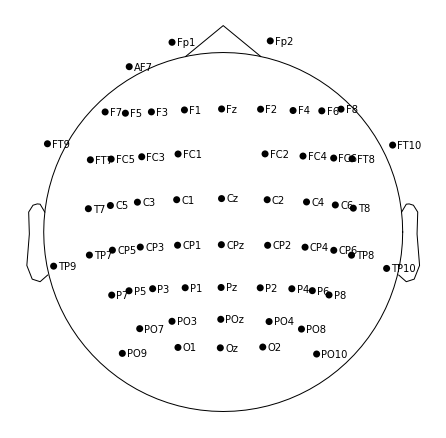

In [13]:
#Plotting the name and position of sensors
raw_data.plot_sensors(show_names=True);

#### Filters

##### Resampling

In [14]:
#Downsampling (1000Hz to 250Hz)
print('Frequency before resampling: ', raw_data.info['sfreq'], 'Hz')

down_data = raw_data.copy().resample(250)

print('Frequency after resampling: ', down_data.info['sfreq'], 'Hz')

Frequency before resampling:  1000.0 Hz
Frequency after resampling:  250.0 Hz


##### Band-pass

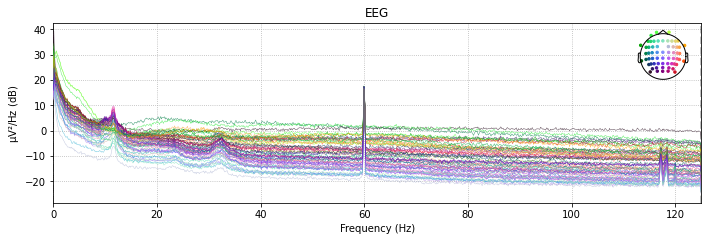

In [15]:
#Plotting the power spectral density
down_data.plot_psd(fmax=125);

In [16]:
#Band-pass filter (high-pass = 0.1Hz and low-pass = 35Hz)
f_data = down_data.copy().filter(l_freq=0.1, h_freq=35)

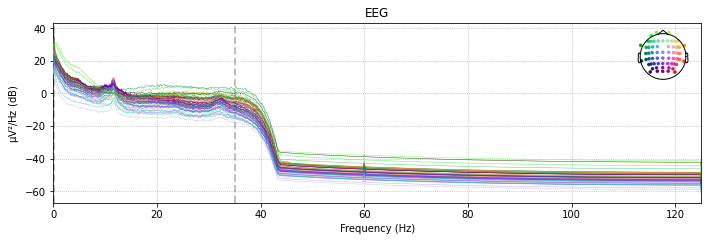

In [17]:
#Plotting the power spectral density
f_data.plot_psd(fmax=125);

/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:263: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  c = np.array(c)


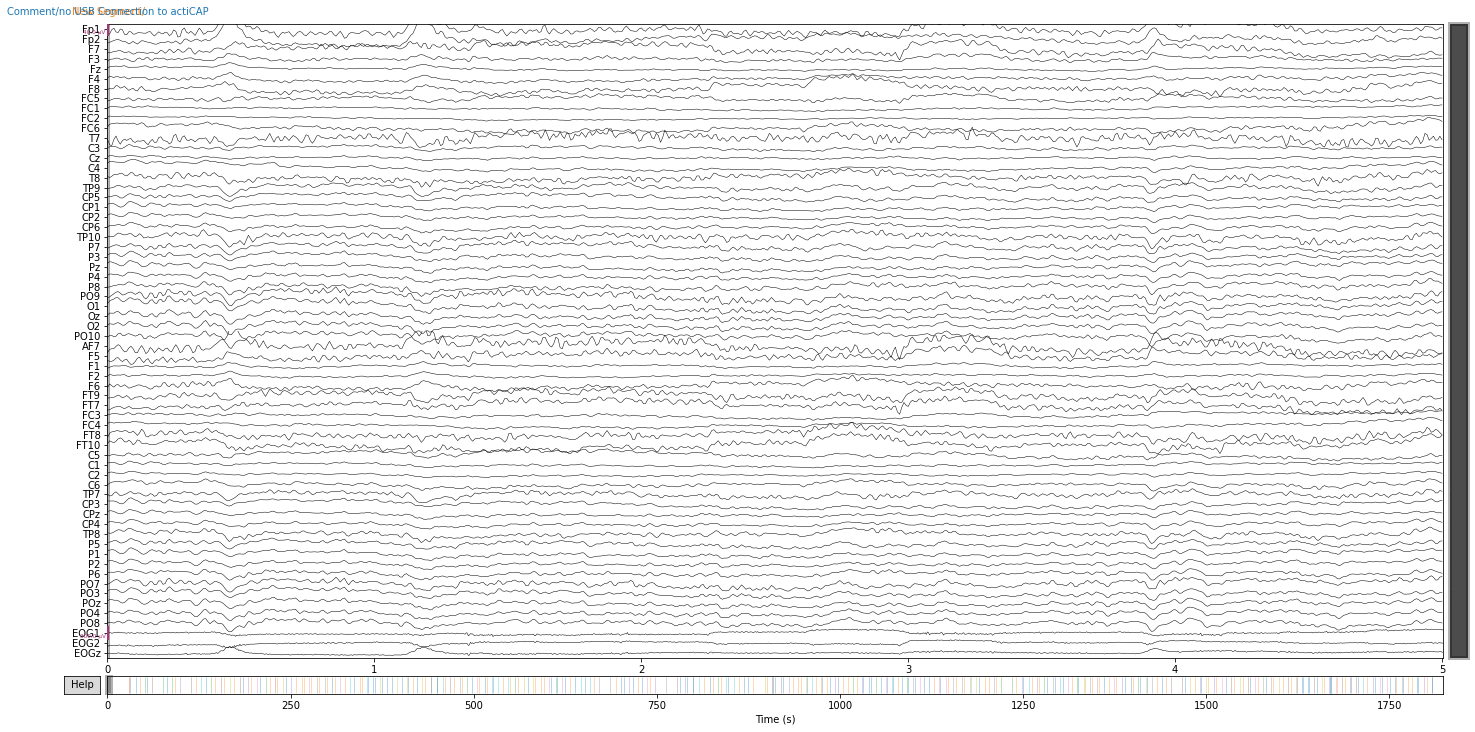

In [18]:
#Plotting filtered data
f_data.plot(n_channels=64, duration=5);

##### Break/Epochs

In [19]:
#Break filtered data into 1s for checking artifacts
tstep = 1.0

picks = mne.pick_types(f_data.info, eeg=True, eog=True, stim=True, meg=False, ecg=False, exclude='bads')
events = mne.make_fixed_length_events(f_data.copy(), duration=tstep)
epochs = mne.Epochs(f_data.copy(), events, tmin=0.0, tmax=tstep, picks=picks, baseline=None, preload=True)
epochs

<Epochs |  1823 events (all good), 0 - 1 sec, baseline off, ~223.5 MB, data loaded,
 '1': 1823>

In [20]:
#Compute global rejection thresholds
from autoreject import get_rejection_threshold

bias_reject = get_rejection_threshold(epochs)
bias_reject

Estimating rejection dictionary for eeg
Estimating rejection dictionary for eog


{'eeg': 0.00018199502439668653, 'eog': 0.00036440880910346146}

In [21]:
#Delete epochs with high bias
#epochs.drop_bad(reject=bias_reject, flat=None)

#WARNING: Removing epochs from the data will influence ERPs.

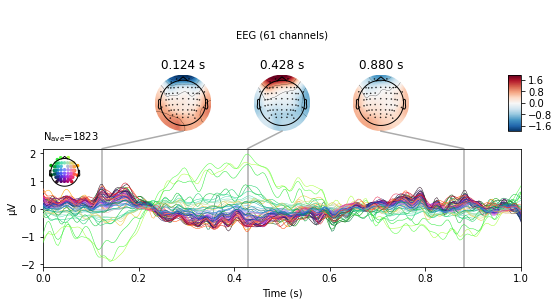

In [22]:
#Plotting the average of the epochs
epochs.average().detrend().plot_joint();

##### PREP pipeline

In [23]:
#Selecting and rebuilding bad electrodes with interpolation (PREP pipeline)
from autoreject import Ransac   # noqa

ransac = Ransac(verbose=True)
epochs_clean = ransac.fit_transform(epochs)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   53.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   53.4s finished


In [24]:
#Bad electrodes
print(ransac.bad_chs_)

#Marking bad electrodes
epochs_clean.info['bads'] = ransac.bad_chs_

['FC4']


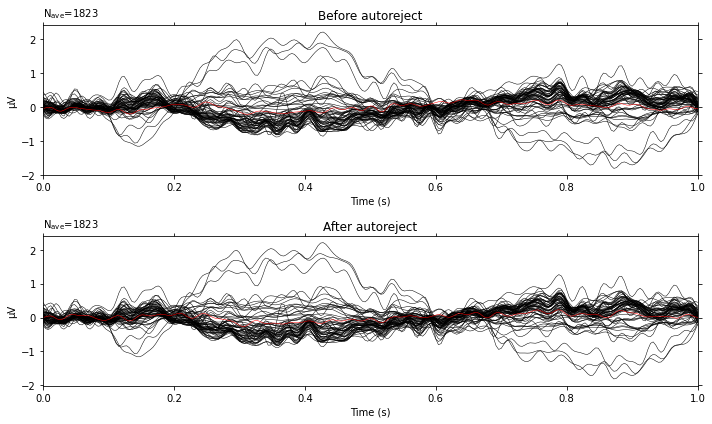

In [25]:
#Plotting the average of the epochs
evoked = epochs.average()
evoked_clean = epochs_clean.average()

#Marking bad electrodes on the evoked
evoked.info['bads'] = ransac.bad_chs_
evoked_clean.info['bads'] = ransac.bad_chs_

fig, axes = plt.subplots(2, 1, figsize=(10, 6))

for ax in axes:
    ax.tick_params(axis='x', which='both', bottom='off', top='off')
    ax.tick_params(axis='y', which='both', left='off', right='off')

evoked.plot(exclude=[], axes=axes[0], show=False)
axes[0].set_title('Before autoreject')
evoked_clean.plot(exclude=[], axes=axes[1], show=False)
axes[1].set_title('After autoreject')
plt.tight_layout()

##### ICA

In [26]:
#Filter high-pass
f_epochs_clean = epochs_clean.copy().filter(l_freq=1, h_freq=None)

In [27]:
# ICA parameters
random_state = 42       # ensures ICA is reproducable each time it's run
ica_n_components = .99  # Specify n_components as a decimal to set % explained variance

#Compute ICA
ica = mne.preprocessing.ICA(n_components=ica_n_components, random_state=random_state)
ica.fit(f_epochs_clean, reject=bias_reject, tstep=tstep)

<ICA | epochs decomposition, method: fastica (fit in 47 iterations on 457573 samples), 25 ICA components explaining 99.1 % of variance (60 PCA components available), channel types: eeg, no sources marked for exclusion>

In [28]:
#Detect EOG related components using correlation
eog_idx, eog_scores = ica.find_bads_eog(f_epochs_clean, ch_name=['EOG1', 'EOG2', 'EOGz'])
print(eog_idx)

[0, 2, 1]


In [29]:
#Detect automatically ECG related components using correlation
#We don't have ECG reference channels

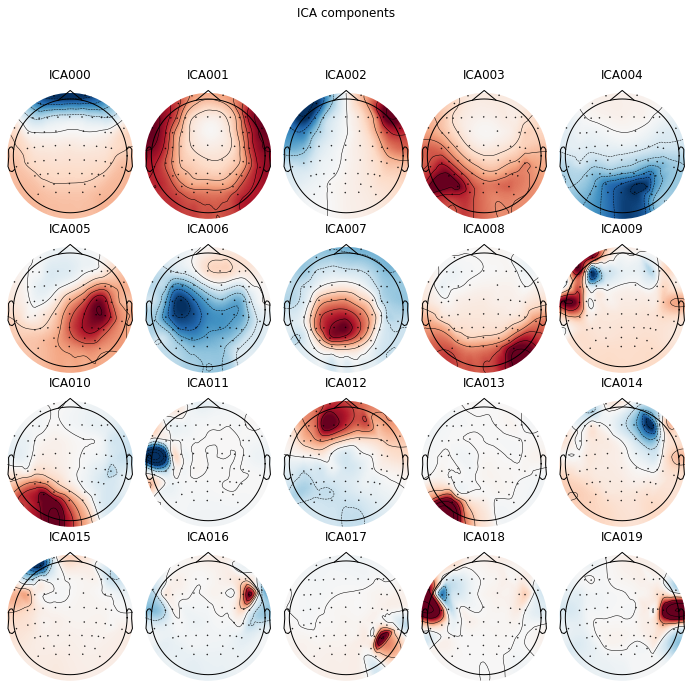

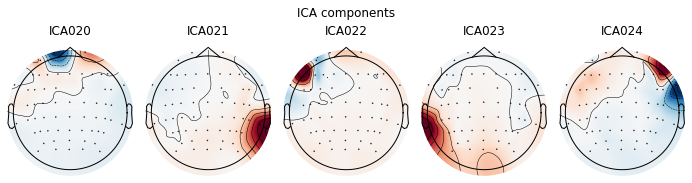

In [30]:
#Plot components
ica.plot_components();

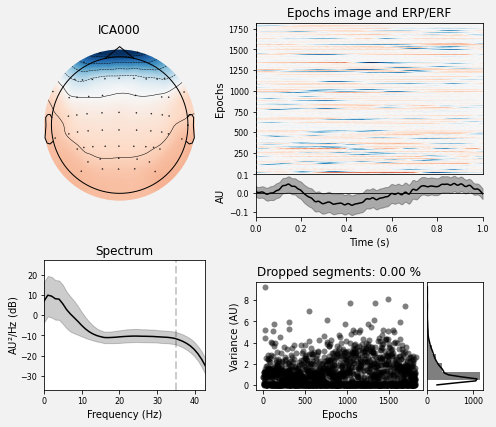

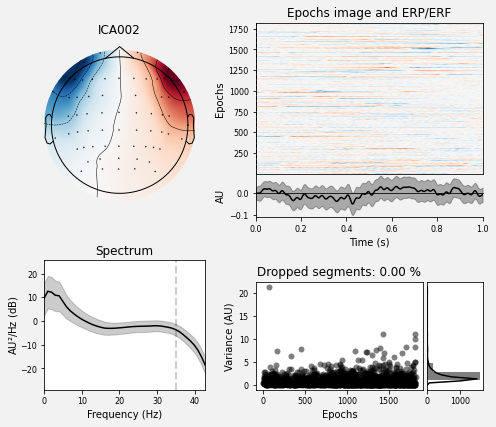

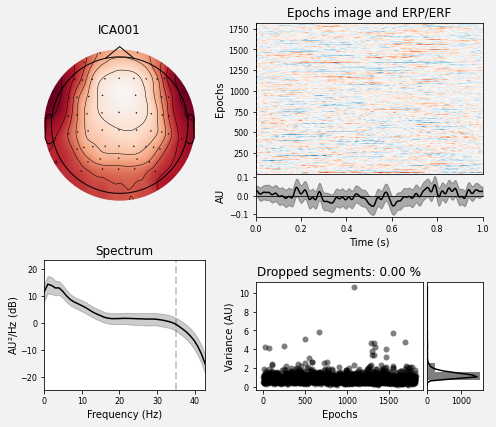

In [31]:
#Plot in the topography of the components in eog_idx
ica.plot_properties(f_epochs_clean, eog_idx);

In [32]:
#Exclude EOG-related components
ica.exclude = eog_idx

/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:263: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  c = np.array(c)


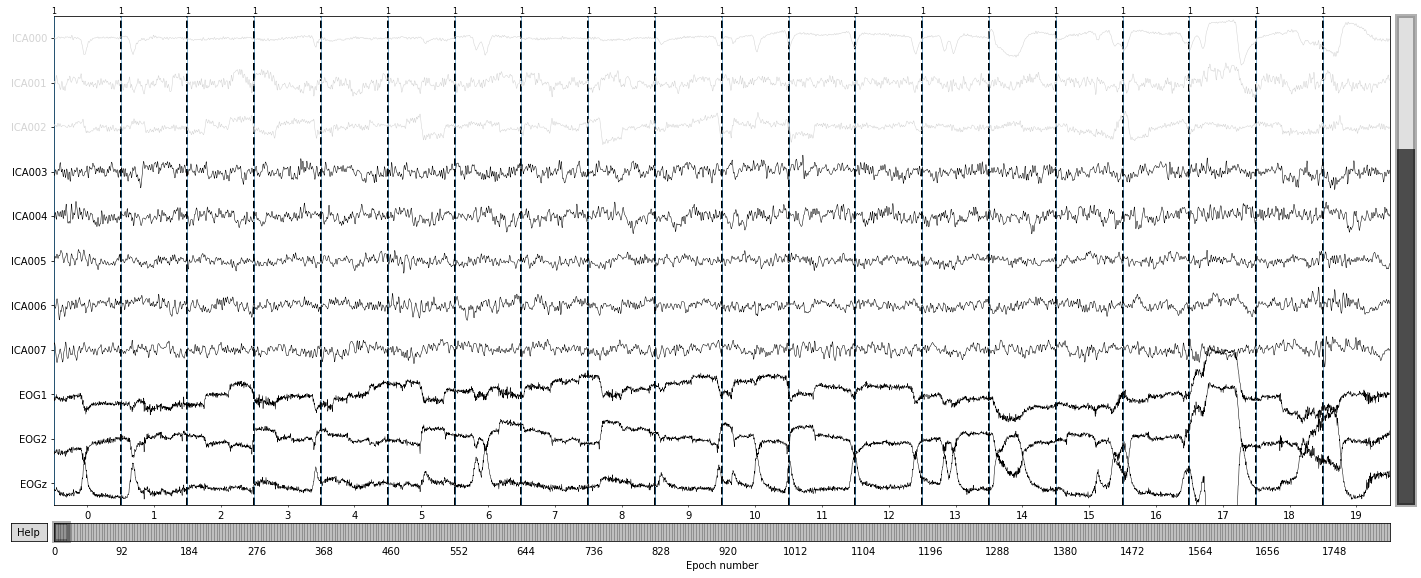

In [33]:
#Resizing plot figure
mne.set_config('MNE_BROWSE_RAW_SIZE','20,8')

#Plot the first seven components
ica.plot_sources(f_epochs_clean, picks=[0, 1, 2, 3, 4, 5, 6, 7]);

In [34]:
#Apply ICA to the data
f_epochs_clean_ica = ica.apply(f_epochs_clean.copy(), exclude=ica.exclude)

##### CAR

In [35]:
#Apply CAR (common average reference)
f_epochs_clean_ica_car = f_epochs_clean_ica.copy().set_eeg_reference('average', ch_type='eeg', projection=True)
f_epochs_clean_ica_car.apply_proj()

<Epochs |  1823 events (all good), 0 - 1 sec, baseline off, ~223.5 MB, data loaded,
 '1': 1823>

##### Comparation before/after the are ICA-CAR

/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:263: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  c = np.array(c)


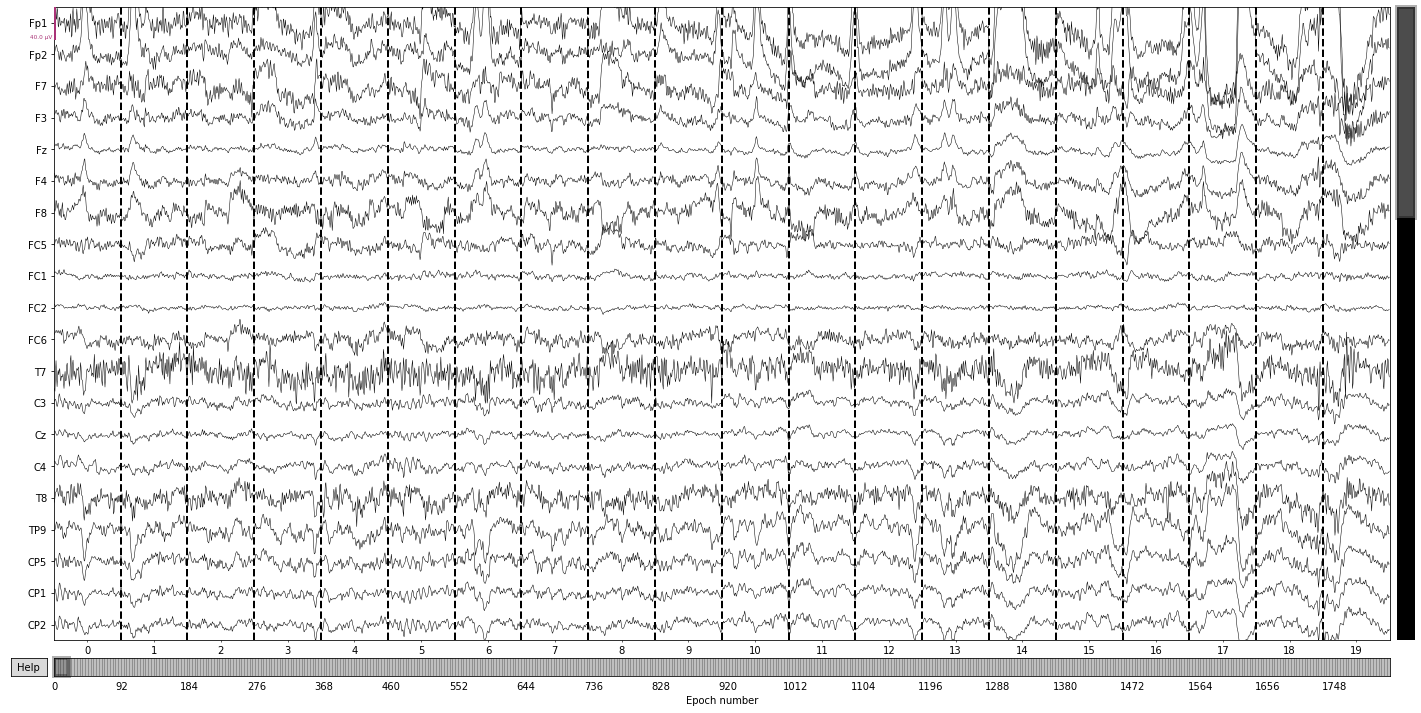

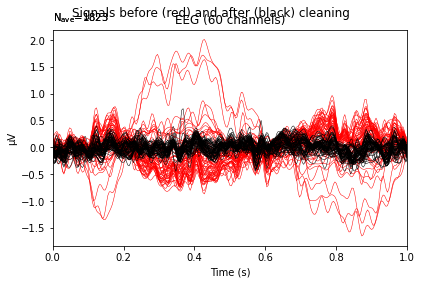

In [36]:
#Resizing plot figure
mne.set_config('MNE_BROWSE_RAW_SIZE','20,10')

#Filtered data before ICA-CAR
f_epochs_clean.plot();
ica.plot_overlay(f_epochs_clean.average());

/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:263: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  c = np.array(c)


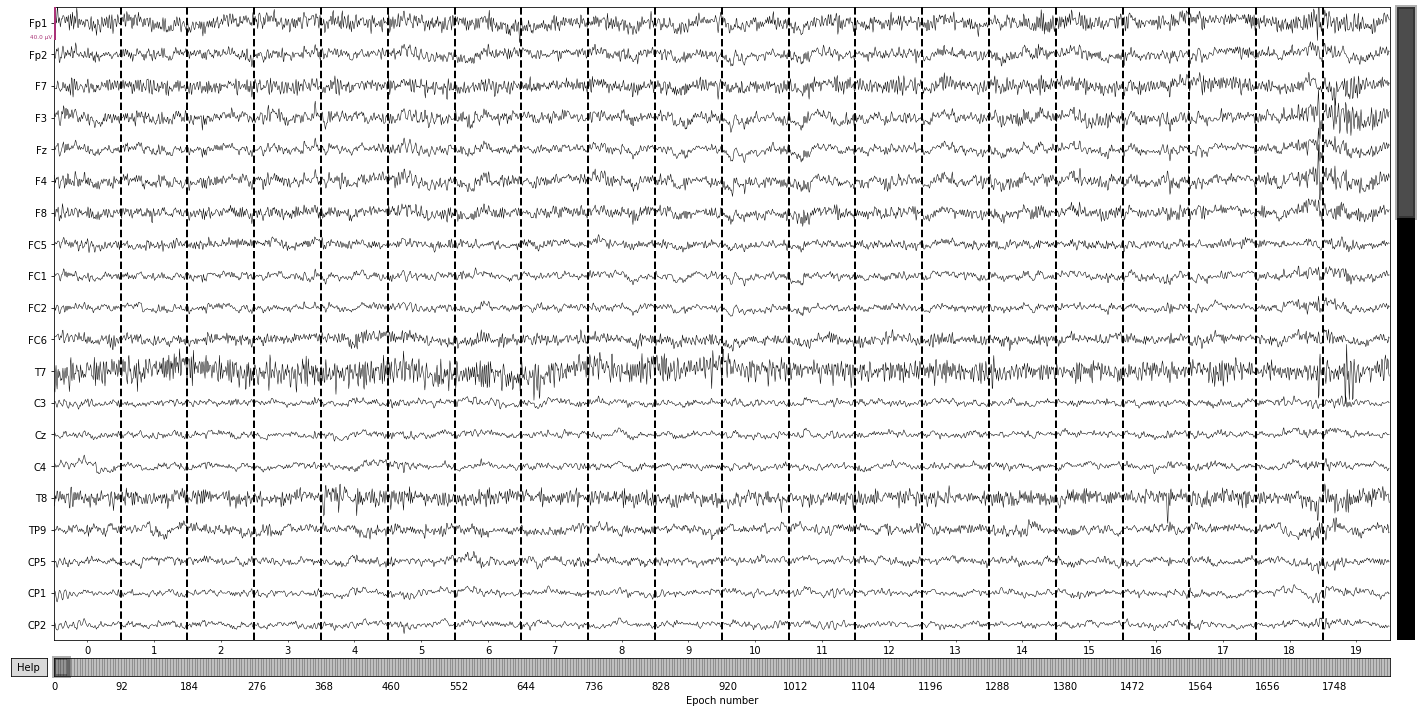

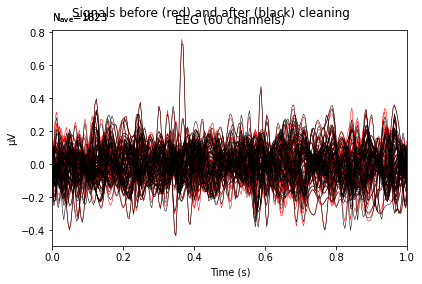

In [37]:
#Resizing plot figure
mne.set_config('MNE_BROWSE_RAW_SIZE','20,10')

#Filtered data after ICA-CAR
f_epochs_clean_ica_car.plot();
ica.plot_overlay(f_epochs_clean_ica_car.average());

##### Merge epochs

In [38]:
n_epochs = f_epochs_clean_ica_car.__len__()
epochs_idx = [idx for idx in range(n_epochs)]
list_epochs = list()

for i in epochs_idx:
  list_epochs.append(f_epochs_clean_ica_car.__getitem__(epochs_idx[i]).copy())

print(f'List with {len(list_epochs)} epochs')

List with 1823 epochs


In [ ]:
#Concatenate epochs pre-processed into one
clean_data = mne.concatenate_epochs(list_epochs)
#clean_data = mne.io.concatenate_raws(list_epochs)
clean_data

#### Selecting channels

In [ ]:
#Selecting only the frontal, parietal, and reference lobe channels for eye movement
p_f_data = clean_data.copy().pick_channels(['F1','F2','F3','F4','F5','F6','F7','F8','Fz','P1','P2','P3','P4','P5','P6','P7','P8','Pz'])
p_f_data

In [ ]:
#Plotting filtered data from selected channels
p_f_data.plot();

#### Trials

In [ ]:
#Get stimulus point and its descriptors
events_stimulus, event_stimulus_dict = mne.events_from_annotations(p_f_data)

In [ ]:
#Segmenting ERP signal:
# - 200 ms before stimulus and 4000 ms after
# - Baseline correction by subtracting the mean potential amplitude from the 200 ms interval immediately preceding the stimulus at each epoch

trials = mne.Epochs(p_f_data, events_stimulus, event_id=event_stimulus_dict, tmin=-0.2, tmax=4, baseline=(None, 0), event_repeated='drop', preload=True)
trials

In [ ]:
trials.plot().ave

#### Save dataset final

In [ ]:
#Datetime of the experiment
#meas_date = s_data.info['meas_date']

#Dataframe with the events
#dt_eeg = s_data.to_data_frame()

#Change time column to datetime type
#dt_eeg['time'] = pd.to_datetime(dt_eeg['time'], unit='ms')

#Change dataframe index to a time column
#dt_eeg.index = dt_eeg.time

#To save the data in a .csv file